#NOTEBOOK 5: Regression
In this notebook, we will focus on predicting the density of the wine using the other measurements. First, we will find correlations between density and the other variables. Then, we will use the classical univariate linear regression approach to predict density using just one predictor variable. Lastly, we will employ several multivariable machine learning regression techniques and compare them using performance metrics.



## Table of Contents
---

* [Correlations](#Correlations)
* [Linear Regression](#Linear_Regression)
* [Multiple Linear Regression](#Multiple_Linear_Regression)
* [Scaling](#Scaling)
* [LASSO](#Lasso)




# Correlations
---

To fit the data with a linear model regression, it is a good practice to employ variables presenting a high correlation with the target. One way to do this is by calculating correlation coefficients and another way is through visual methods.

We will predict the density for red wines, so we import the data and then inspect the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")

We can use the **corr** from Pandas to calculate the pairwise correlation of dataset columns. For more information, please visit the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html 'pandas.DataFrame.corr')

In [2]:
correlations = df.corr()['density'].drop(['quality', 'density'])
print(correlations)

fixed acidity           0.265331
volatile acidity        0.027114
citric acid             0.149503
residual sugar          0.838966
chlorides               0.257211
free sulfur dioxide     0.294210
total sulfur dioxide    0.529881
pH                     -0.093591
sulphates               0.074493
alcohol                -0.780138
Name: density, dtype: float64


Another way is making an interactive graph with ipywidgets that allows us to visualize the different correlations.

In [3]:
import ipywidgets as widgets
from IPython.display import display

Predictor_Var = list(df.columns)

def CorrVis(Predictor_Var):
  plt.scatter(df['density'],df[Predictor_Var])
  plt.xlabel('Density')
  plt.ylabel(Predictor_Var)
  print('Corr Coef = ', np.corrcoef(df['density'],df[Predictor_Var])[0,1])

widgets.interactive(CorrVis, Predictor_Var = list(df.columns))

interactive(children=(Dropdown(description='Predictor_Var', options=('fixed acidity', 'volatile acidity', 'cit…

#Linear Regression
---

In this section, we will perform a linear regression using alcohol as the predictor variable ($x_i$) and density as the target ($y_i$), according to the model:

$
y_i = β_1 x_i + β_0
$

We will split the data into training and test sets, which is commonly done in machine learning methods for validation of the model created. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 'sklearn.model_selection.train_test_split').

In [4]:
from sklearn.model_selection import train_test_split

X = df[['alcohol']]
y = df['density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

We first import the library to perform the linear regression and define which is the predictor variable and the target. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 'sklearn.linear_model.LinearRegression').

In [5]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

Let's print the parameters of the linear regression.

In [6]:
print('β1 = ' + str(linear_regression.coef_) + ', β0 = ' + str(linear_regression.intercept_))

β1 = [-0.00190561], β0 = 1.01408716780891


We can quantify how good the adjustment was by using the $R^2$ parameter. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 'Regression metrics') 

$
R^2 =1- \frac{\sum{ (y_i-\hat{y})^2}}{\sum{(y_i-\overline{y})^2}}
$

The adjustments usually are better on the training sets than the test sets, but in this case, we will find that the training set has some outliers that make this adjustment for the training set worse.

In [7]:
from sklearn.metrics import r2_score
y_pred_test = linear_regression.predict(X_test)
y_pred_train = linear_regression.predict(X_train)

print('R2 train = ', r2_score(y_train, y_pred_train))
print('R2 test = ', r2_score(y_test, y_pred_test))


R2 train =  0.59265087229245
R2 test =  0.644777803115205


One way to visualize how good the adjustment was is to plot the predicted value against the actual value.

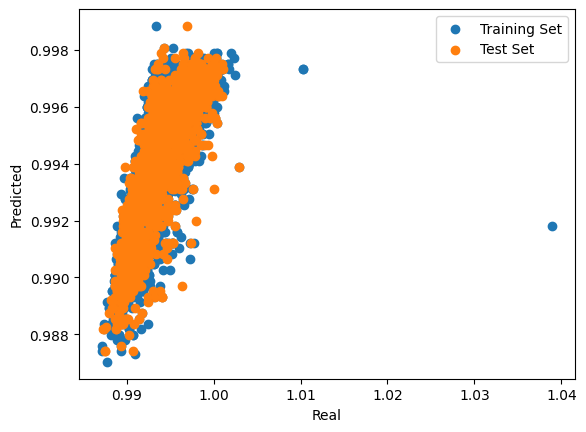

In [8]:
plt.scatter(y_train,y_pred_train, label='Training Set')
plt.scatter(y_test,y_pred_test, label='Test Set')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.legend()


#Multiple Linear Regression
---

Multiple linear regression (MLR) is a generalization of classical linear regression. MLR models a linear relationship between the target response and multiple explanatory variables.

$y_i =β_0​	 +β_1	 x_{i1}​	 + β_2 x_{i2}​	 +...+ β_p​	 x_{ip}​
$

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(['quality', 'density'], axis=1)
y = df['density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Since MLR is a generalization, the **Scikit Learn** library uses the same function that we used before.

In [10]:
from sklearn.linear_model import LinearRegression

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

Increasing the number of predictor variables leads to a better adjustment of the target so that the value of $R^2$ increases.

In [11]:
from sklearn.metrics import r2_score

pred_train_lr = multiple_linear_regression.predict(X_train)
pred_test_lr = multiple_linear_regression.predict(X_test)

print('R2 training = ', r2_score(y_train, pred_train_lr))
print('R2 test = ', r2_score(y_test, pred_test_lr))

R2 training =  0.9608334119853044
R2 test =  0.9724221101555639


Another useful metric is $RSME$. It has the advantage that it can be used for non-linear models. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 'Regression metrics').

$
RMSE =\sqrt{ \frac{1}{n} \sum{(y_i - \hat{y})^2}}
$

In [12]:
from sklearn.metrics import mean_squared_error
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test_lr))
print('RSME test= ', rmse_test)

RSME test=  0.00047624213322229874


Again, we can use a graph to compare the training and test set.

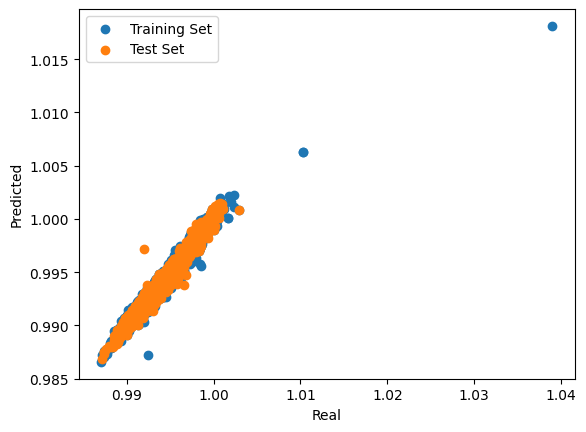

In [13]:
plt.scatter(y_train,pred_train_lr, label='Training Set')
plt.scatter(y_test,pred_test_lr, label='Test Set')

plt.xlabel('Real')
plt.ylabel('Predicted')
plt.legend()

Let's analyze the coefficients of the MLR and pay attention to their magnitude. It seems difficult to conclude anything about their importance.

In [14]:
coefficients = pd.DataFrame(multiple_linear_regression.coef_,X.columns.tolist())
coefficients.columns = ['Coefficients'] 
print(coefficients)

                      Coefficients
fixed acidity             0.000784
volatile acidity          0.000808
citric acid               0.000347
residual sugar            0.000380
chlorides                 0.005043
free sulfur dioxide      -0.000007
total sulfur dioxide      0.000004
pH                        0.003579
sulphates                 0.001487
alcohol                  -0.001112


<Axes: >

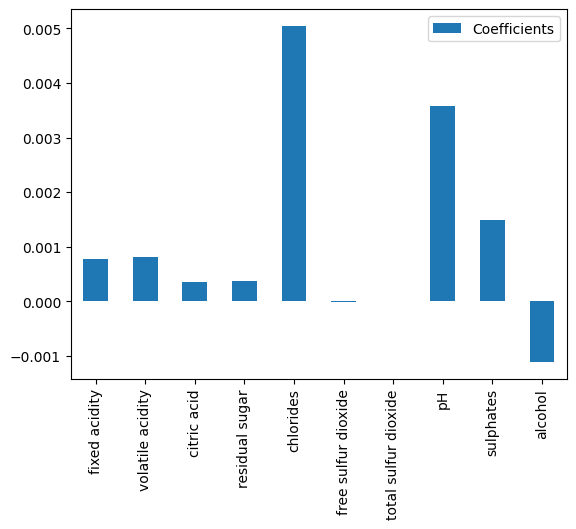

In [15]:
coefficients.plot.bar()

#Standardization
---

The standardization is a method to transform the different predictor variables into comparable ranges. Using standardized data, a higher coefficient indicates that it is a predictor variable that has more importance to predict the target.

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(['quality', 'density'], axis=1)
y = df['density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Standardizing after splitting the dataset is a way to avoid bias.

In [17]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = multiple_linear_regression.predict(X_test)

rmse_MLR = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print('R2 test = ', r2)
print('RSME test = ', rmse_MLR)

R2 test =  0.9724221101555643
RSME test =  0.0004762421332222952


As the data is standardized, we can analyze the coefficients and determine which are the most important predictor variables.

In [20]:
coefficients = pd.DataFrame(multiple_linear_regression.coef_,X.columns.tolist())
coefficients.columns = ['Coefficients'] 
print(coefficients)

                      Coefficients
fixed acidity             0.000664
volatile acidity          0.000082
citric acid               0.000042
residual sugar            0.001960
chlorides                 0.000108
free sulfur dioxide      -0.000123
total sulfur dioxide      0.000156
pH                        0.000538
sulphates                 0.000169
alcohol                  -0.001370


We can see that some variables are less important to generate the regression model. It is worth noticing that using only the alcohol, the residual sugar, the fixed acids, and the pH might make a better model since the other variables do not affect notably the prediction and introduce noise into the model.

<Axes: >

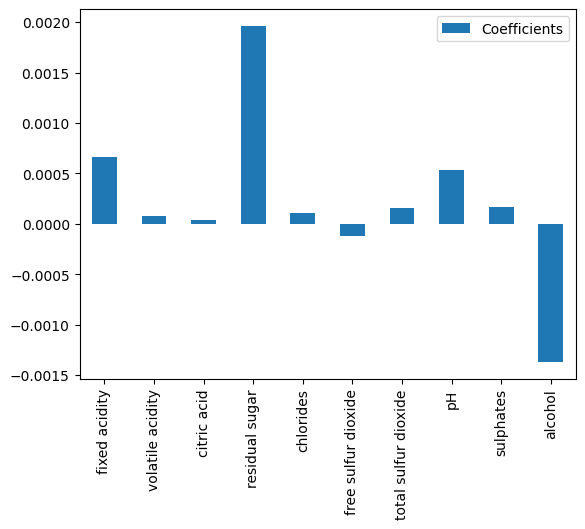

In [21]:
coefficients.plot.bar()

#LASSO
---

Least Absolute Shrinkage and Selection Operator (LASSO) is a linear regression method that produces variable selection and regularization to improve the prediction accuracy and generate a smaller model. This method uses a cost function with a constant alpha that defines the degree of penalization.

$
LASSO_{CostFunction}=\sum_{i=1}^M (y_i-\hat{y_i})^2=\sum_{i=1}^M (y_i-\sum_{j=0}^p w_j \times x_{ij})^2 + \alpha\sum_{j=0}^p |w_j| \\
For \; some \; t \, > \, 0, \, \sum_{j=0}^p |w_j|<t
$

**Scikit learn** has implemented LASSO in the function **sklearn.linear_model.Lasso**. For more information, please visit the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html 'sklearn.linear_model.Lasso').


In [22]:
from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=0.0001)
lasso_regression.fit(X = X_train, y = y_train)

Lasso(alpha=0.0001)

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = lasso_regression.predict(X_test)


r2 = r2_score(y_test, y_pred)
print('R2 test = ', r2)

R2 test =  0.9680058702120279


Let's analyze if using LASSO we have a smaller model where some of the coefficients are zero.

In [24]:
coeffecients = pd.DataFrame(lasso_regression.coef_,X.columns.tolist())
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

                      Coeffecient
fixed acidity            0.000518
volatile acidity         0.000000
citric acid              0.000000
residual sugar           0.001855
chlorides                0.000027
free sulfur dioxide     -0.000000
total sulfur dioxide     0.000090
pH                       0.000345
sulphates                0.000096
alcohol                 -0.001337


<Axes: >

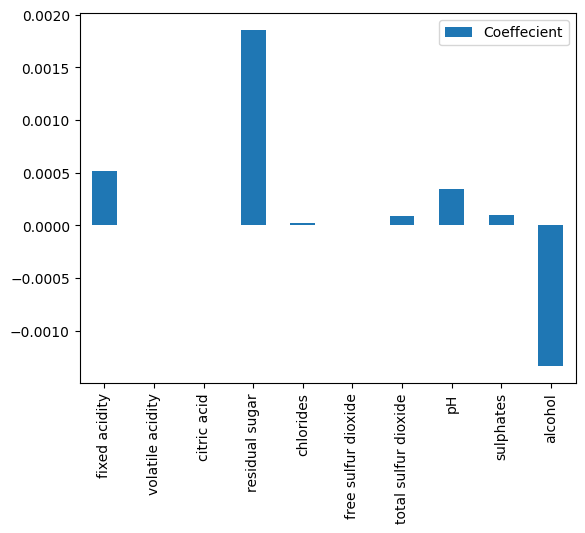

In [25]:
coeffecients.plot.bar()

Finally, we will analyze how the RSME of the training and test sets change for different alpha values.

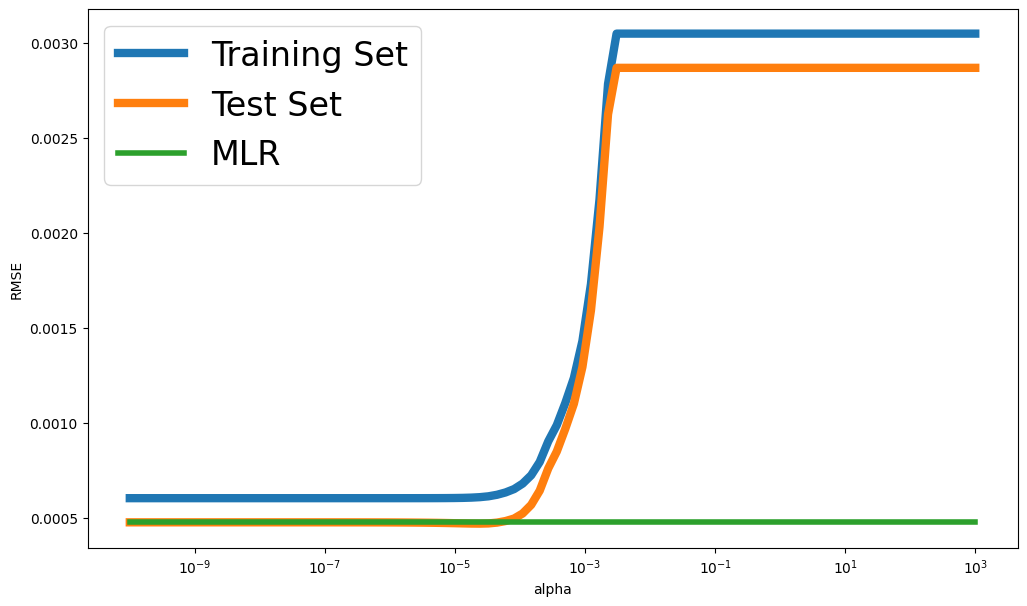

In [26]:
alphas=np.logspace(-10,3,endpoint=True,num=100,base=10)
RMSE=[]
RMSE_p=[]
for x in (alphas):
    #print(x)
    model_lasso = Lasso(x)
    model_lasso.fit(X_train, y_train)
    pred_test_lasso= model_lasso.predict(X_test)
    pred_train_lasso=model_lasso.predict(X_train)
    RMSE_p.append(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
    RMSE.append(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))

fig=plt.gcf()
fig.set_size_inches(12,7)

plt.plot(alphas,RMSE, label='Training Set', linewidth=6)
plt.plot(alphas,RMSE_p, label='Test Set',linewidth=6)
plt.plot(alphas,len(alphas)*[rmse_MLR], label='MLR',linewidth=4)
plt.xscale("log")
plt.xlabel('alpha')
plt.ylabel('RMSE')

plt.rc('font', size=26)          # controls default text sizes
plt.rc('axes', titlesize=26)     # fontsize of the axes title
plt.rc('axes', labelsize=26)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=26)    # fontsize of the tick labels
plt.rc('ytick', labelsize=26)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('figure', titlesize=18)  # fontsize of the figure title  

plt.legend()

We can also make an advanced graph using ipywidgets that allow us to change the coefficients according to the value of alpha.

In [27]:
import ipywidgets as widgets

from IPython.display import display
from sklearn import preprocessing


data_lasso = df.copy()
data_lasso = data_lasso.drop(labels = ['quality','density'],axis = 1)
features = data_lasso.columns.tolist()
data_lasso = preprocessing.StandardScaler().fit_transform(data_lasso)
y_lasso = df['density']

def Lassovis(alpha):
    lasso_regression = Lasso((alpha))
    lasso_regression.fit(X = data_lasso, y = y_lasso)
        
    plt.figure(figsize=(10, 6))
    plt.subplot(211)
    pred_test_lasso=lasso_regression.predict(X_test)
    plt.scatter(y_test,pred_test_lasso)
    plt.xlabel('y_test')
    plt.ylabel('pred_test_lasso')

    plt.subplot(212)
    plt.bar(features,lasso_regression.coef_)
    plt.xticks(rotation=90)

widgets.interact(Lassovis,alpha=widgets.FloatLogSlider(name='Alpha', base=10, min=-5, max=-2, step=0.25, value=0.001));

interactive(children=(FloatLogSlider(value=0.001, description='alpha', max=-2.0, min=-5.0, step=0.25), Output(…